## Assignment: Data Augmentation and Robustness in Sentiment Analysis

**Background:**  
To deepen your understanding of NLP, this assignment focuses on *data augmentation* and *robustness testing* for sentiment classification. Instead of standard embedding or vectorization, you will explore how to make sentiment models more resilient to noisy, paraphrased, or adversarial inputs.

### Instructions and Point Breakdown

#### 1. Dataset Preparation and Preprocessing (2 points)

- Select a sentiment-labeled dataset (e.g., IMDB, Amazon, Yelp, or any short reviews).
- Preprocess the text by:
  - Lowercasing
  - Removing punctuation and stopwords
  - Tokenizing
- Briefly justify your dataset choice.

#### 2. Data Augmentation Techniques (3 points)

- Implement at least **two** of the following augmentation methods:
  - Synonym replacement using WordNet or a transformer model
  - Back translation (e.g., English → French → English)
  - Random word deletion or swap
  - Paraphrase generation using a pre-trained model
- Show code for each method and generate augmented samples for at least 10% of your dataset.
- Compare the vocabulary size and diversity before and after augmentation.

#### 3. Sentiment Classification Model (2 points)

- Train a baseline classifier (e.g., logistic regression, SVM, or a simple neural network) using the original data.
- Retrain the same model with the augmented dataset.
- Report accuracy, precision, recall, and F1-score for both models in a Markdown table.

#### 4. Robustness Testing (2 points)

- Create a *noisy* test set by introducing typos, slang, or adversarial edits to a subset of test samples.
- Evaluate both models (original and augmented) on this noisy set.
- Visualize and interpret the difference in performance (e.g., bar chart or confusion matrix).

#### 5. Technical Reflection (1 point)

- In a Markdown cell, answer:
  - How did data augmentation affect model robustness?
  - Which augmentation technique was most effective, and why?
  - Suggest another way to improve NLP model robustness.

### Submission Requirements

- Jupyter Notebook containing:
  - Code with comments (Sections 1–4)
  - Outputs: augmented samples, metrics, and plots
  - Reflection (Section 5)
- Use Python libraries: `nltk`, `sklearn`, `pandas`, `matplotlib`, and optionally `transformers` or `textattack`

#### Grading Rubric

| Section                        | Points |
|:-------------------------------|:------:|
| Dataset prep & preprocessing   |   2    |
| Data augmentation              |   3    |
| Classification model           |   2    |
| Robustness testing             |   2    |
| Quality of reflection          |   1    |
| **Total**                      | **10** |

# *Sources/References*
* data source: [Amazon Reviews 2023](https://amazon-reviews-2023.github.io/)
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
* https://www.geeksforgeeks.org/data-analysis/how-to-name-the-column-when-using-valuecounts-function-in-pandas/
* https://www.geeksforgeeks.org/python/get-synonymsantonyms-nltk-wordnet-python/
* https://www.geeksforgeeks.org/python/select-random-element-from-set-in-python/
* https://medium.com/analytics-vidhya/how-to-translate-text-with-python-9d203139dcf5
* https://www.geeksforgeeks.org/pandas/how-to-combine-two-dataframe-in-python-pandas/
* https://stackoverflow.com/questions/40476680/how-to-use-tqdm-with-pandas-in-a-jupyter-notebook
* https://www.geeksforgeeks.org/nlp/text-augmentation-techniques-in-nlp/
* https://www.geeksforgeeks.org/python/python-pandas-dataframe-sample/

# **Installs & Imports**

In [2]:
!pip install deep-translator tqdm textattack -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.7/445.7 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Appliances.jsonl.gz
!gunzip Appliances.jsonl.gz --quiet

--2025-09-13 20:50:25--  https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Appliances.jsonl.gz
Resolving mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)... 169.228.63.88
Connecting to mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)|169.228.63.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270209794 (258M) [application/gzip]
Saving to: ‘Appliances.jsonl.gz’

Appliances.jsonl.gz 100%[===================>] 257.69M  91.5MB/s    in 2.8s    

2025-09-13 20:50:28 (91.5 MB/s) - ‘Appliances.jsonl.gz’ saved [270209794/270209794]



In [4]:
# Data preprocessing libraries
import json
import pandas
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords # To remove stopwords in NLTK
nltk_stopwords = set(stopwords.words("english")) # Load English stopwords once for efficiency
import math

# Data augumentation libraries
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import random

# Back translation libraries
from deep_translator import GoogleTranslator
from tqdm import tqdm

# Baseline model classifier libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Evaluation/Visualization libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Add unwnated noise to text libraries
from textattack.augmentation import EasyDataAugmenter # Generates original text but with a mix of word insertions, substitutions, and deletions to it

# libraries
import matplotlib
import sklearn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.12/dist-packages/j

# **1. Dataset Preparation and Preprocessing (2 points)**
I choose this dataset because it contains recent (2023) Amazon reviews. I choose appliances.jsonl dataset because the dataset size was large enough but not so large that I would have trouble downloading the jsonl file. About appliances.jsonl...
* User = 1.8M
* Item = 94.3K
* Rating = 2.1M
* R_Token = 92.8M

In [5]:
# Retrieve n reviews, load as json objects.
max_reviews = 20000 # Get n maxmimum reviews
filename = "Appliances.jsonl"
truncated_reviews = []
reviews_count = 0

with open(filename, 'r') as json_file:
    for line in json_file:
        full_review = json.loads(line.strip())
        truncated_review = {"rating": full_review["rating"], "title": full_review["title"], "text": full_review["text"]}
        truncated_reviews.append(truncated_review)
        reviews_count += 1
        if reviews_count == max_reviews:
            break
reviews_dataframe = pandas.DataFrame.from_dict(truncated_reviews)
display(reviews_dataframe.tail())

,rating,title,text
19995,5.0,Vintage Frigidaire,Works perfectly with my 1962 Frigidaire cooktop.
19996,3.0,Three Stars,"Refrigerator doesn't recognize this filter, so..."
19997,5.0,Five Stars,As described.
19998,5.0,Fits most makers,Used to filter a Mr. Coffee. Very good.
19999,5.0,Easy repair,Easy to install 69 year old female fixed my dr...


In [6]:
# Preprocess text by removing punctuation, extra whitespace, and stopwords.
def preprocess_text(text: str) -> str:
    text = text.lower() # Lowercase all text.
    text = re.sub(r"[^\w\s]", "", text) # Remove punctuation
    text = re.sub(r"\b\w\b", " ", text)
    text = re.sub(r"\s+", " ", text) # remove extra whitespace
    text_no_stopwords = [token for token in text.split(" ") if token not in nltk_stopwords] # Store only the non-stopwords
    text_no_stopwords = " ".join(text_no_stopwords)
    return text_no_stopwords

preprocessed_dataframe = reviews_dataframe.copy() # Make a copy of original dataframe
preprocessed_dataframe["text"] = reviews_dataframe["text"].map(preprocess_text) # Preprocess the copy's data


# Tokenization & stopwords
print("Original:", reviews_dataframe["text"][0])
print("Preprocessed:", preprocessed_dataframe["text"][0])

Original: work great. use a new one every month
Preprocessed: work great use new one every month


In [7]:
# Convert numerical ratings to binary categories (negative (0) vs positive (1) reviews)
def categorize_ratings(numerical_rating: float) -> int:
    highest_rating = 5.0
    threshold = math.ceil(highest_rating/2.0)
    if numerical_rating <= threshold:
        return 0
    else:
        return 1
labeled_dataframe = preprocessed_dataframe.copy() # Make a copy of original dataframe
labeled_dataframe["label"] = preprocessed_dataframe["rating"].map(categorize_ratings) # Categorize by ratings
display(labeled_dataframe.tail())

,rating,title,text,label
19995,5.0,Vintage Frigidaire,works perfectly 1962 frigidaire cooktop,1
19996,3.0,Three Stars,refrigerator doesnt recognize filter filter wa...,0
19997,5.0,Five Stars,described,1
19998,5.0,Fits most makers,used filter mr coffee good,1
19999,5.0,Easy repair,easy install 69 year old female fixed dryer sa...,1


#**2. Data Augmentation Techniques (3 points)**
- Implement at least **two** of the following augmentation methods:
  - Synonym replacement using WordNet or a transformer model
  - Back translation (e.g., English → French → English)
  - Random word deletion or swap
  - Paraphrase generation using a pre-trained model
- Show code for each method and generate augmented samples for at least 10% of your dataset.
- Compare the vocabulary size and diversity before and after augmentation.

In [8]:
print("Dataset label ratio (Negative = 0. Positive = 1)")
count_ratings = labeled_dataframe["label"].value_counts()
print(count_ratings)

Dataset label ratio (Negative = 0. Positive = 1)
label
1    16753
0     3247
Name: count, dtype: int64


In [9]:
# Augumentation method 1 - Synonym replacement using WordNet
def new_text_from_synonyms(text: str) -> str:
    new_text = text
    for word in text.split(" "):
        synonyms = {}
        if not wordnet.synsets(word):
            continue  # If word doesn't have a synset
        word_synset = wordnet.synsets(word)[0]
        for synset in wordnet.synsets(word):
            similarity = word_synset.wup_similarity(synset)
            if synset.lemmas()[0].name() not in word: # Ensure synonym isn't just the same word
                synonyms[synset] = similarity
        if synonyms: # If syonyms exist
            best_synonym = max(synonyms, key=synonyms.get)
            new_text = new_text.replace(word, best_synonym.lemmas()[0].name())
    return new_text

synonym_dataframe = labeled_dataframe.copy()[labeled_dataframe["label"] == 0] # Double the amount of new negative review texts by generating synonym equivalents
synonym_dataframe["text"] = synonym_dataframe["text"].map(new_text_from_synonyms) # Categorize by ratings
display(synonym_dataframe.tail())

,rating,title,text,label
19952,2.0,Not Able To Connect To Natural Gas,ascribable placement organ_organ_pipe adjustme...,0
19976,1.0,THESE ARE JUNK!!,peak share descent share prevents evidence app...,0
19984,3.0,Three Stars,bang-up expensive establish cubic_yard rubbish...,0
19987,1.0,Wrong size for Frididaire,get lighter light_bulb awhile ago travel inst...,0
19996,3.0,Three Stars,refrigerator doesnt acknowledge percolate perc...,0


In [10]:
# Augumentation method 2 - Back translation
def back_translate(text: str) -> str:
    text = " ".join(text.split()[:100]) # Use only at most the first 100 words
    chinese = GoogleTranslator(source="english", target="chinese (traditional)").translate(text)
    english = GoogleTranslator(source="chinese (traditional)", target="english").translate(chinese)
    return english

tqdm.pandas() # see backtranslation progress
back_translation_dataframe = labeled_dataframe.copy()[labeled_dataframe["label"] == 0] # Double the amount of new negative review texts by generating synonym equivalents
back_translation_dataframe["text"] = back_translation_dataframe["text"].progress_map(back_translate) # Categorize by ratings
display(back_translation_dataframe.tail())

100%|██████████| 3247/3247 [1:02:34<00:00,  1.16s/it]


,rating,title,text,label
19952,2.0,Not Able To Connect To Natural Gas,Properly placed pipe fit connection pointing d...,0
19976,1.0,THESE ARE JUNK!!,The highest part falls to prevent the ground f...,0
19984,3.0,Three Stars,Expensive find yard garbage bags are much cheaper,0
19987,1.0,Wrong size for Frididaire,Installation some time before receiving the li...,0
19996,3.0,Three Stars,Refrigerator cannot recognize filter warning l...,0


In [12]:
# Compare vocabulary size & diversity before & after augmentation.
def get_vocab_size(dataframe, rows=10) -> int:
    texts = dataframe.copy()["text"].iloc[:rows] # Get first 10 texts from negative reviews
    texts = " ".join(texts)
    texts = set(texts)
    return len(texts) # Return # of unique texts

negative_dataframe = labeled_dataframe.copy()[labeled_dataframe["label"] == 0]
original_size = get_vocab_size(negative_dataframe)
synonym_size = original_size + get_vocab_size(synonym_dataframe)
back_translation_size = synonym_size + get_vocab_size(back_translation_dataframe)
print("Vocab size for 1st 10 negative reviews...")
print("0. Original, vocab size =", original_size)
print("1. synonym replacement, vocab size =", synonym_size)
print("2. back translation, vocab size =", back_translation_size)

# Combine augumented dataframes to original dataframe
full_dataframe = pandas.concat([labeled_dataframe.copy(), synonym_dataframe])
full_dataframe = pandas.concat([full_dataframe.copy(), back_translation_dataframe])

print("\n\nORIGINAL+AUGUMENTED dataset label ratio (Negative = 0. Positive = 1)")
print(full_dataframe["label"].value_counts())

Vocab size for 1st 10 negative reviews...
0. Original, vocab size = 29
1. synonym replacement, vocab size = 67
2. back translation, vocab size = 115


ORIGINAL+AUGUMENTED dataset label ratio (Negative = 0. Positive = 1)
label
1    16753
0     9741
Name: count, dtype: int64


# **3. Sentiment Classification Model (2 points)**
- Train a baseline classifier (e.g., logistic regression, SVM, or a simple neural network) using the original data.
- Retrain the same model with the augmented dataset.
- Report accuracy, precision, recall, and F1-score for both models in a Markdown table.

| **Original data**              |        |
|:-------------------------------|:------:|
| accuracy                       | 0.8736 |
| precision                      | 0.9441 |
| recall                         | 0.9026 |
| F1-score                       | 0.9229 |
| AUC                            | 0.8880 |

>>

>>
| **Original + Augumented data** |        |
|:-------------------------------|:------:|
| accuracy                       | 0.9031 |
| precision                      | 0.9202 |
| recall                         | 0.9272 |
| F1-score                       | 0.9237 |
| AUC                            | 0.9494 |

In [18]:
# ORIGINAL dataset
print("ORIGINAL DATASET:")
X_original = labeled_dataframe.text
y_original = labeled_dataframe.label
print(X_original.shape, y_original.shape)

# Split data (75% train, 25% test)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, random_state=1, stratify=y_original)
print("X train shape =", X_train_original.shape, " y train shape =", y_train_original.shape)
print("X test shape =", X_test_original.shape, " y test shape =", y_test_original.shape)

vect_original = CountVectorizer()
X_train_dtm_original = vect_original.fit_transform(X_train_original)  # Fit on training data
X_test_dtm_original = vect_original.transform(X_test_original)        # Transform test data


logreg_original = LogisticRegression(class_weight="balanced", max_iter=1000)
logreg_original.fit(X_train_dtm_original, y_train_original)
y_pred_class_original = logreg_original.predict(X_test_dtm_original)
y_pred_prob_original = logreg_original.predict_proba(X_test_dtm_original)[:, 1]  # predicted prob for class 1

print(f"Accuracy: {accuracy_score(y_test_original, y_pred_class_original):.4f}")
print(f"Precision: {precision_score(y_test_original, y_pred_class_original):.4f}") # Out of all predicted positives, how many were actually positive?
print(f"Recall: {recall_score(y_test_original, y_pred_class_original):.4f}") # Out of all actual positives, how many were captured?
print(f"F1 Score: {f1_score(y_test_original, y_pred_class_original):.4f}") # Harmonic mean of precision and recall
print(f"AUC: {roc_auc_score(y_test_original, y_pred_prob_original):.4f}")



# ORIGINAL+AUGUMENTED dataset
print("\n\nORIGINAL+AUGUMENTED DATASET:")
X_full = full_dataframe.text  # Feature: Amazon appliance product review text
y_full = full_dataframe.label  # Label: negative = 1 & positive = 0
print(X_full.shape, y_full.shape)

# Split data (75% train, 25% test)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, stratify=y_full)
print("X train shape =", X_train_full.shape, " y train shape =", y_train_full.shape)
print("X test shape =", X_test_full.shape, " y test shape =", y_test_full.shape)

vect_full = CountVectorizer()
X_train_dtm_full = vect_full.fit_transform(X_train_full)  # Fit on training data
X_test_dtm_full = vect_full.transform(X_test_full)        # Transform test data


logreg_full = LogisticRegression(class_weight="balanced", max_iter=1000)
logreg_full.fit(X_train_dtm_full, y_train_full)
y_pred_class_full = logreg_full.predict(X_test_dtm_full)
y_pred_prob_full = logreg_full.predict_proba(X_test_dtm_full)[:, 1]  # predicted prob for class 1
print(f"Accuracy: {accuracy_score(y_test_full, y_pred_class_full):.4f}")
print(f"Precision: {precision_score(y_test_full, y_pred_class_full):.4f}") # Out of all predicted positives, how many were actually positive?
print(f"Recall: {recall_score(y_test_full, y_pred_class_full):.4f}") # Out of all actual positives, how many were captured?
print(f"F1 Score: {f1_score(y_test_full, y_pred_class_full):.4f}") # Harmonic mean of precision and recall
print(f"AUC: {roc_auc_score(y_test_full, y_pred_prob_full):.4f}")

ORIGINAL DATASET:
(20000,) (20000,)
X train shape = (15000,)  y train shape = (15000,)
X test shape = (5000,)  y test shape = (5000,)
Accuracy: 0.8736
Precision: 0.9441
Recall: 0.9026
F1 Score: 0.9229
AUC: 0.8880


ORIGINAL+AUGUMENTED DATASET:
(26494,) (26494,)
X train shape = (19870,)  y train shape = (19870,)
X test shape = (6624,)  y test shape = (6624,)
Accuracy: 0.9031
Precision: 0.9202
Recall: 0.9272
F1 Score: 0.9237
AUC: 0.9494


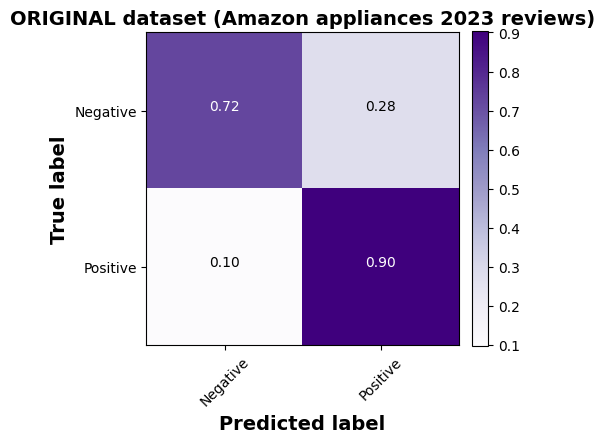

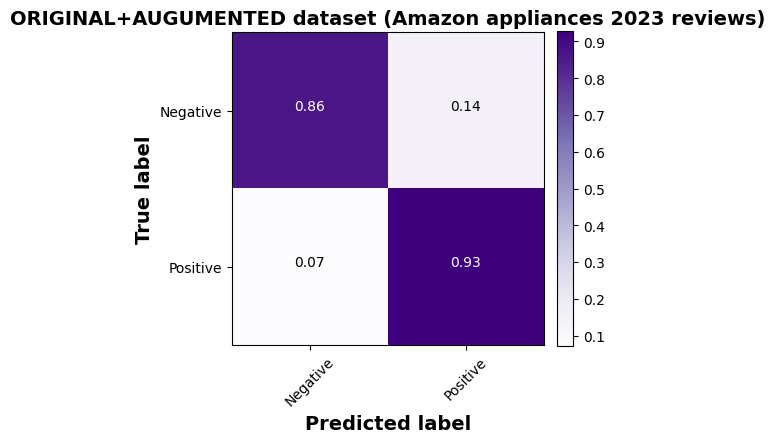

In [14]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Purples, ax=None):
    """
    Plots a confusion matrix using matplotlib.

    Args:
        cm (np.ndarray): Confusion matrix to plot.
        classes (list): List of class names.
        normalize (bool): Whether to normalize the matrix.
        title (str): Title for the plot.
        cmap: Colormap for the plot.
        ax: Matplotlib Axes object to plot on.

    Returns:
        None
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title, fontsize=14, weight='bold')
    # Add a colorbar with reduced size
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Annotate each cell with the numeric value
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center",
                color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label', fontsize=14, weight='bold')
    ax.set_xlabel('Predicted label', fontsize=14, weight='bold')
    plt.tight_layout()

fig, ax = plt.subplots(figsize=(5, 6))

original_matrix = confusion_matrix(y_test_original, y_pred_class_original)
plot_confusion_matrix(original_matrix, classes=["Negative","Positive"], normalize=True,
                      title="ORIGINAL dataset (Amazon appliances 2023 reviews)", ax=ax)

fig, ax = plt.subplots(figsize=(5, 6))
full_matrix = confusion_matrix(y_test_full, y_pred_class_full)
plot_confusion_matrix(full_matrix, classes=["Negative","Positive"], normalize=True,
                      title="ORIGINAL+AUGUMENTED dataset (Amazon appliances 2023 reviews)", ax=ax)

# **4. Robustness Testing (2 points)**

In [15]:
eda_augmenter = EasyDataAugmenter(pct_words_to_swap=0.05, transformations_per_example=1) # Initialize the EasyDataAugmenter. Alter 5% of original text. Generate 1 altered text.

def generate_noisy_text(text: str) -> str:
    text = " ".join(text.split()[:100]) # Use only at most the first 100 words
    return eda_augmenter.augment(text) # Insert, delete, and substitute words in text. Generate new text.

print("ORIGINAL DATASET:")
original_noisy_dataframe = labeled_dataframe.sample(n=5000)
tqdm.pandas() # see progress of function being applied to dataframe rows
original_noisy_dataframe["text"] = original_noisy_dataframe["text"].progress_map(generate_noisy_text) # Generate new noise
display(original_noisy_dataframe.tail())

print("\n\n\nORIGINAL+AUGUMENTED DATASET:")
full_noisy_dataframe = full_dataframe.sample(n=6624)
tqdm.pandas() # see progress of function being applied to dataframe rows
full_noisy_dataframe["text"] = full_noisy_dataframe["text"].progress_map(generate_noisy_text) # Categorize by ratings
display(full_noisy_dataframe.tail())

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


ORIGINAL DATASET:


100%|██████████| 5000/5000 [40:53<00:00,  2.04it/s]


,rating,title,text,label
4732,5.0,Good purchase,[several months say fridge awesome ordered hea...,1
9634,5.0,A must for all Chemex brewers when using a hot...,[love bamboo kitchen utensils gadgets chemex c...,1
16632,4.0,Would buy again.,[work keurig 20 without freedom clip installed...,1
6879,5.0,Cuisinart Cuisinart HomeBarista Reusable Filte...,[cuisinart coffeemaker highly recommend use cu...,1
5501,5.0,Great fit and quality,[one fridge buy],1





ORIGINAL+AUGUMENTED DATASET:


100%|██████████| 6624/6624 [46:39<00:00,  2.37it/s]


,rating,title,text,label
12939,5.0,Premium Gas Cooktop!!,[installed last night beauty im using propane ...,1
8047,5.0,works,[continue purchase buy],1
5296,5.0,Frees up lots of space in our fridge,[ordered two buy eggs case 60 eggs box takes m...,1
4541,5.0,Good quality and fast shipping.,[good quality fast shipping installing discove...,1
3110,2.0,poor performer,[Others say that dishwashers seem to have litt...,0


In [33]:
original_noisy_dataframe["text1"] = original_noisy_dataframe["text"].apply(lambda x: x[0] if isinstance(x, list) else x)
full_noisy_dataframe["text1"] = full_noisy_dataframe["text"].apply(lambda x: x[0] if isinstance(x, list) else x)

# ORIGINAL+AUGUMENTED dataset
print("ORIGINAL test + NOISE dataset:")
X_test_original_noisy = original_noisy_dataframe.text1  # Feature: Amazon appliance product review text
y_test_original_noisy = original_noisy_dataframe.label  # Label: negative = 1 & positive = 0

X_test_dtm_original_noisy = vect_original.transform(X_test_original_noisy)  # Transform test data

y_pred_class_original_noisy = logreg_original.predict(X_test_dtm_original_noisy)
y_pred_prob_original_noisy = logreg_original.predict_proba(X_test_dtm_original_noisy)[:, 1]  # predicted prob for class 1

print(f"Accuracy: {accuracy_score(y_test_original_noisy, y_pred_class_original_noisy):.4f}")
print(f"Precision: {precision_score(y_test_original_noisy, y_pred_class_original_noisy):.4f}") # Out of all predicted positives, how many were actually positive?
print(f"Recall: {recall_score(y_test_original_noisy, y_pred_class_original_noisy):.4f}") # Out of all actual positives, how many were captured?
print(f"F1 Score: {f1_score(y_test_original_noisy, y_pred_class_original_noisy):.4f}") # Harmonic mean of precision and recall
print(f"AUC: {roc_auc_score(y_test_original_noisy, y_pred_class_original_noisy):.4f}")



# ORIGINAL+AUGUMENTED+NOISE dataset
print("\n\nORIGINAL+AUGUMENTED+NOISE dataset:")
X_test_full_noisy = full_noisy_dataframe.text1  # Feature: Amazon appliance product review text
y_test_full_noisy = full_noisy_dataframe.label  # Label: negative = 1 & positive = 0

X_test_dtm_full_noisy = vect_full.transform(X_test_full_noisy)  # Transform test data

y_pred_class_full_noisy = logreg_full.predict(X_test_dtm_full_noisy)
y_pred_prob_full_noisy = logreg_full.predict_proba(X_test_dtm_full_noisy)[:, 1]  # predicted prob for class 1

print(f"Accuracy: {accuracy_score(y_test_full_noisy, y_pred_class_full_noisy):.4f}")
print(f"Precision: {precision_score(y_test_full_noisy, y_pred_class_full_noisy):.4f}") # Out of all predicted positives, how many were actually positive?
print(f"Recall: {recall_score(y_test_full_noisy, y_pred_class_full_noisy):.4f}") # Out of all actual positives, how many were captured?
print(f"F1 Score: {f1_score(y_test_full_noisy, y_pred_class_full_noisy):.4f}") # Harmonic mean of precision and recall
print(f"AUC: {roc_auc_score(y_test_full_noisy, y_pred_class_full_noisy):.4f}")

ORIGINAL test + NOISE dataset:
Accuracy: 0.9150
Precision: 0.9750
Recall: 0.9221
F1 Score: 0.9478
AUC: 0.9004


ORIGINAL+AUGUMENTED+NOISE dataset:
Accuracy: 0.9507
Precision: 0.9589
Recall: 0.9634
F1 Score: 0.9611
AUC: 0.9461


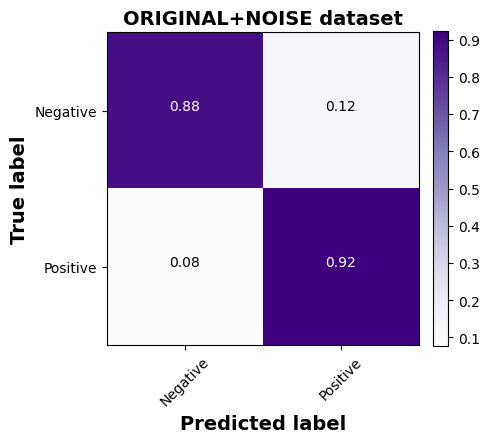

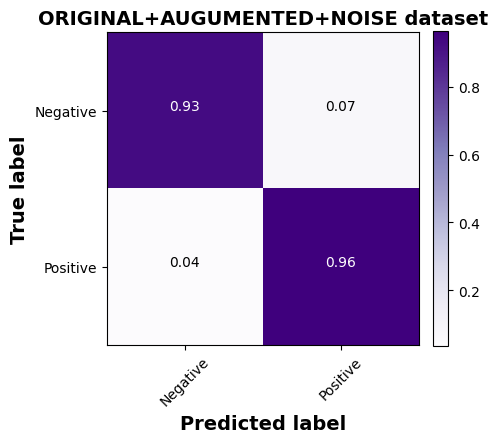

In [34]:
fig, ax = plt.subplots(figsize=(5, 6))

original_noisy_matrix = confusion_matrix(y_test_original_noisy, y_pred_class_original_noisy)
plot_confusion_matrix(original_noisy_matrix, classes=["Negative","Positive"], normalize=True,
                      title="ORIGINAL+NOISE dataset", ax=ax)

fig, ax = plt.subplots(figsize=(5, 6))
full_noisy_matrix = confusion_matrix(y_test_full_noisy, y_pred_class_full_noisy)
plot_confusion_matrix(full_noisy_matrix, classes=["Negative","Positive"], normalize=True,
                      title="ORIGINAL+AUGUMENTED+NOISE dataset", ax=ax)

# **5. Technical Reflection (1 point)**
  - *How did data augmentation affect model robustness?* My model's ability to correctly predict negative labels improved after data augumentation of augumenting more samples of minority class (negative reviews)
  - *Which augmentation technique was most effective, and why?* Synonym replacement was a bit better in introducing vocabulary diversity than the 1 round of back translation, because google translate is a really good translator, it usually translates the english text back exactly how it was inputted into the other language translation so for some sample's text, there wasn't much difference. On the other hand, I made sure that synonym replacement would replace words with their different synonyms when possible.
  - *Suggest another way to improve NLP model robustness.* To make the model more robust, more real samples from the minority group could be used. Additionally, augumented data could be generated through 2 rounds of backtranslation i.e. english->Chinese->Russian->english. This could introduce more variety of language/structure in the text data samples.